## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

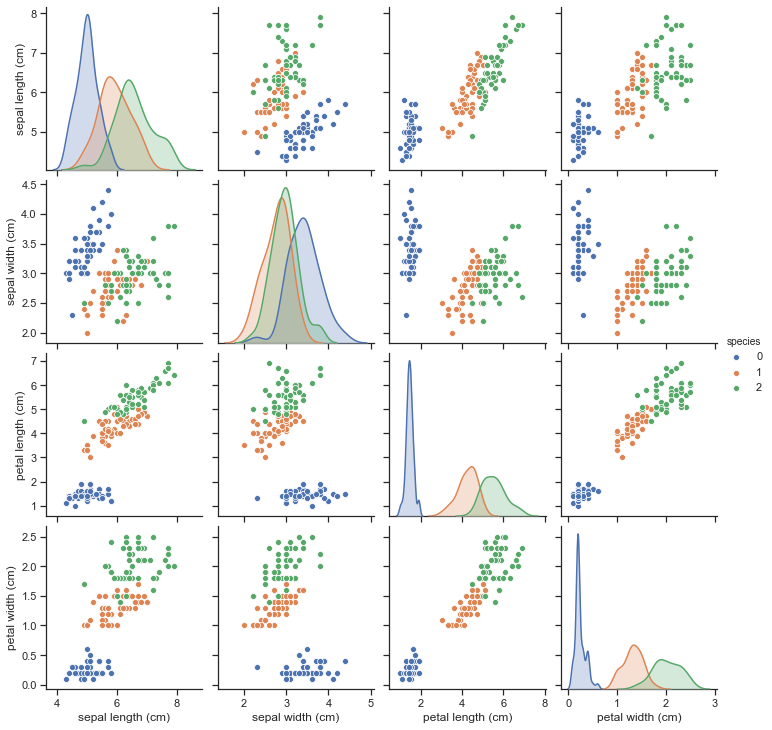

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
def myplotGrid(X, y):
    '''
    Function:
        Draws many subplots
    ----------
    Attributes or values taken in:
        Data and label for plots
    ----------
    Return:
        Does not return anything
    '''
    
    import seaborn as sns

    colour_option = np.array(['r', 'y', 'b'])    
    chosen_feature = ['alcohol', 'flavanoids', 'color_intensity', 'ash']
    FIGURE_SIZE = 20

    plt.clf()
    f, axes = plt.subplots(4, 4, figsize = (FIGURE_SIZE, FIGURE_SIZE))
    
    for k in range(4): 
         for a in range(4):
            if(k == a):
                for b in range(3):
                    sns.kdeplot(X[:, k][y == b], ax = axes[k, k], label = np.array([0, 1, 2]), alpha = 0.3, color = colour_option[b], shade = True)
            else:
                axes[k, a].set_xlabel(chosen_feature[a])                 
                axes[k, a].scatter(X[:, k], X[:, a], s = 10, alpha = 0.7, color = colour_option[y]) 
        
            axes[k, a].grid()
            if(a == 0):
                axes[k, a].set_ylabel(chosen_feature[k])  
                
    plt.show()

<Figure size 432x288 with 0 Axes>

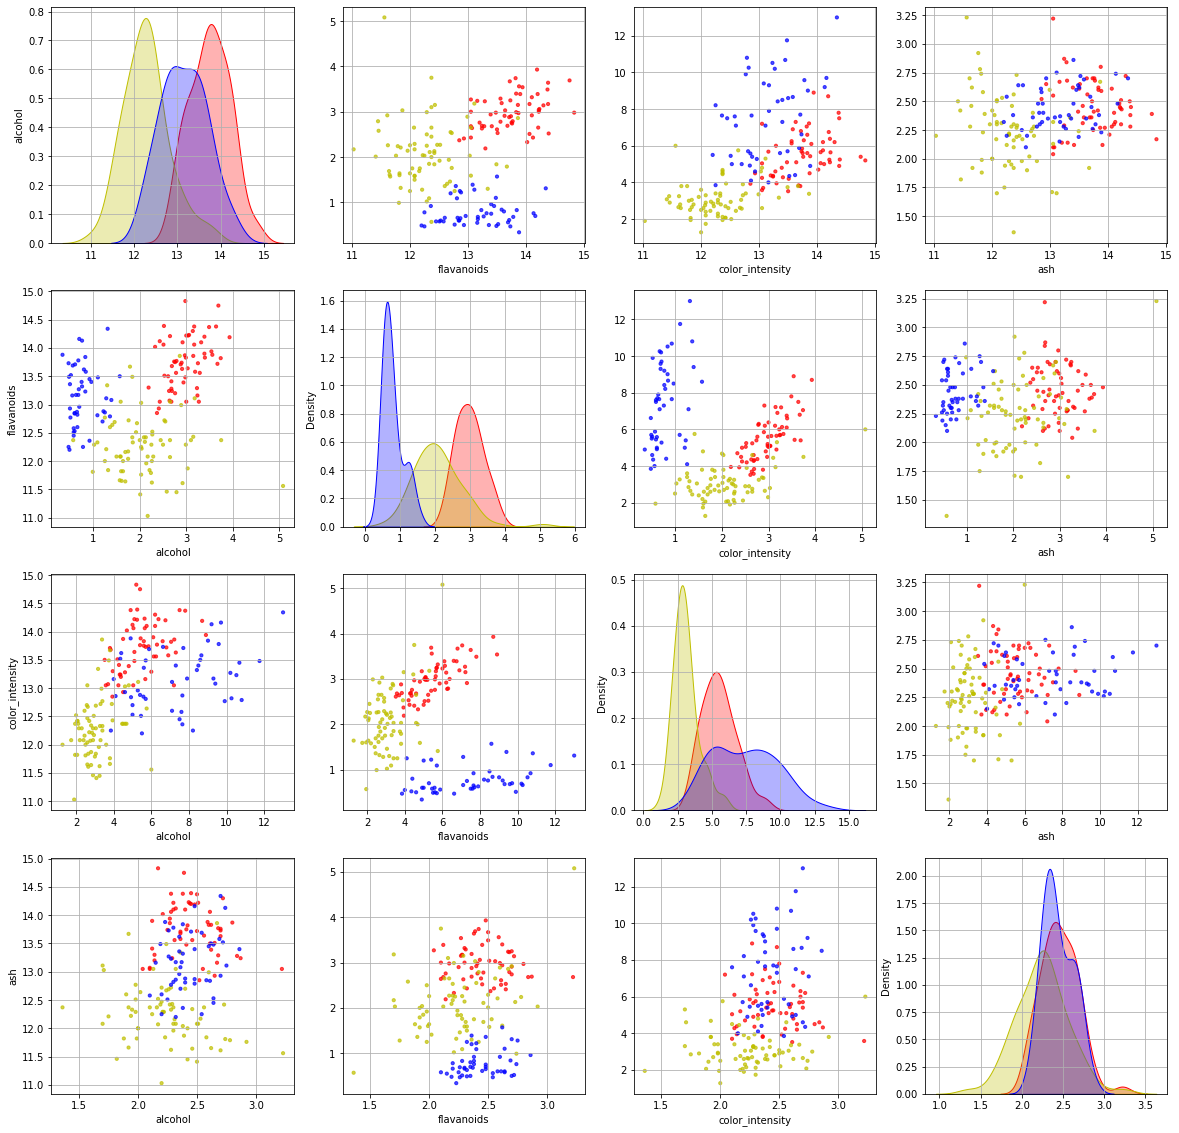

In [3]:
myplotGrid(X, y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [4]:
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)

<Figure size 432x288 with 0 Axes>

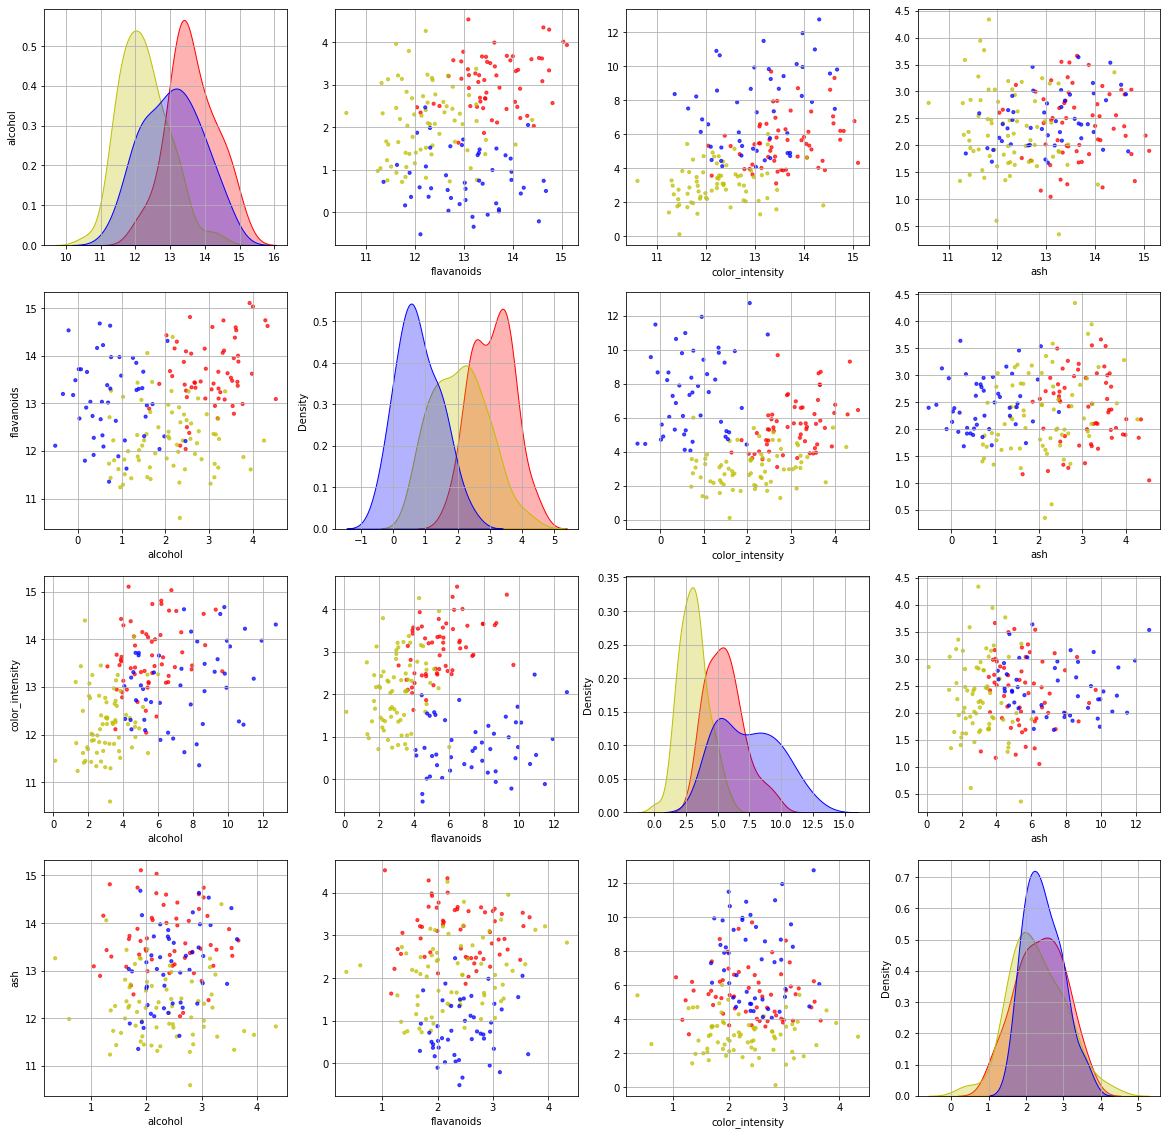

In [5]:
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:

I would build a classifier using flavanoids and ash. This is because when gaussian noise is added, the visual graphs showed a more obvious change. Hence the data is more spread out for these two features, making it easier for classifiers to perform its function to calculate the accuracy.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

When Gaussian noise is added, the data becomes less spread out and and the range in which they are plotted at decreases. This is because the noise has more crossover and it becomes less distinctly separated.


## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [6]:
import numpy as np
import math, random
from collections import Counter

In [7]:
def euc_distance(j, k):

    '''
    Function:
        It calculates the euclidean distance of 2 n-dimensional vectors and returning a distance
    ----------
    Attributes or values taken in:
        Values j and k
    ----------
    Return:
        The distance
    '''
    return np.linalg.norm(j-k, axis=0)

In [8]:
def man_distance(j, k):

    '''
    Function:
        It calculates the manhatten distance of 2 n-dimensional vectors and returning a distance
    ----------
    Attributes or values taken in:
        Values j and k
    ----------
    Return:
        The distance
    '''
    
    # Ensure vectors are of equal length
    value = 0
    assert len(j)==len(k)
    for w in range(0, len(j)):
        value = value + math.fabs(j[w] - k[w])
    return value

In [9]:
def split_train_test(X, y, testsize):
    
    '''
    Function:
        It splits data by a given fraction
    ----------
    Attributes or values taken in:
        X,
        y,
        testsize
    ----------
    Return:
        X as training data, 
        y  as training outputs, 
        X_ as testing data,
        y_ as predicted outputs for X_
    '''    
    
    # Shuffle X value and the y value
    mySeed=1234
    np.random.seed(mySeed)
    l = np.arange(X.shape[0])
    l = np.random.permutation(l)
    X = X[l]
    y = y[l]
    
    
    # Set value of test size
    assert (testsize > 0.0 and testsize < 1.0)
    

    # Use the cut point from test size fraction to split X and y 
    cutting_Pointss = int(len(X)*(testsize))
    X_ = X[0:cutting_Pointss]
    y_ = y[0:cutting_Pointss]
    X = X[cutting_Pointss:]
    y = y[cutting_Pointss:]
    return (X, X_, y, y_)

In [10]:
def mykNN(X, y, X_, k, type_of_distance):
    
    '''
    Function:
        Using kNN to return list of predicted values for test inputs
    ----------
    Attributes or values taken in:
        X,
        y,
        X_,
        k = number of neighbours,
        type_of_distance = "manhattan_type" or "euclidean_type"
    ----------
    Return:
        A list that has all the prediction value for the test inputs
    ''' 
    
    prediction=[]  

    for x in X_:
        neighbours=[[],[]]
        
        # Helps to calculate distance between each and every datapoint
        if type_of_distance=="manhattan_type":
            dist = [man_distance(x, j) for j in X]  
        elif type_of_distance=="euclidean_type":
            dist = [euc_distance(x, j) for j in X]

        kn_inst = np.argsort(dist)[:k]
        kn_label = [y[m] for m in kn_inst]
        c_value = np.bincount(kn_label)
        prediction.append(np.argmax(c_value))
    return np.array(prediction)

# splitting
X, X_, y, y_ = split_train_test(X, y, 0.5)

# getting prediction
y_ = mykNN(X, y, X_, 3, "euclidean_type")

print("The predicted values are: \n")
print(y_)

print("\n")

print("The true values are: \n")
print(y_)

print("\n")

# print(myAccuracy_test(y_, y))
# unable to print as it causes error

The predicted values are: 

[1 1 1 1 2 1 2 0 0 2 2 2 0 1 1 0 0 2 2 2 0 1 1 2 1 2 0 0 0 1 0 1 0 1 0 1 0
 2 0 0 2 0 1 2 1 1 0 2 1 2 0 2 2 1 0 0 2 1 1 0 0 1 2 0 1 0 2 1 1 2 2 2 0 0
 0 0 0 1 1 2 2 0 0 2 2 2 0 2 1]


The true values are: 

[1 1 1 1 2 1 2 0 0 2 2 2 0 1 1 0 0 2 2 2 0 1 1 2 1 2 0 0 0 1 0 1 0 1 0 1 0
 2 0 0 2 0 1 2 1 1 0 2 1 2 0 2 2 1 0 0 2 1 1 0 0 1 2 0 1 0 2 1 1 2 2 2 0 0
 0 0 0 1 1 2 2 0 0 2 2 2 0 2 1]




## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [11]:
def confusionMatrix_test(testing,prediction,z):
    
    '''
    Function:
        It calculates the confusion matrix for test and prediction data
    ----------
    Attributes or values taken in:
        Array with all labels for test data
        Array with all values for prediction
    ----------
    Return:
        The confusion matrix
    '''     
    
    # Initialise matrix of zero that is n dimensional
    confusion_matrix = np.zeros((z,z), dtype=np.int)
    
    for i in range(0, len(prediction)):
        #incrementing matrix value
        confusion_matrix[testing[i]][prediction[i]] += 1
        
    return confusion_matrix

In [12]:
def precision_test(testing,prediction):  
    
    '''
    Function:
        It calculates the precision value of the test
    ----------
    Attributes or values taken in:
        Values for prediction
        Test output
    ----------
    Return:
        For each class, a list of precision
    '''      
    the_class = np.unique(prediction)
    n = len(the_class)
    prec = np.zeros(the_class.shape)
    
    # Retrieving the confusion matrix
    confusionmat = confusionMatrix_test(testing,prediction,n)
    
    # Looping over each class and result
    for i in range(0,n):
        tf_pos=0
        
        for j in the_class:
            tf_pos+=confusionmat[j][i]
            
        precision_class=confusionmat[i][i]/tf_pos
        prec[i]=precision_class
        
    return prec

In [13]:
def myAccuracy_test(testing,prediction):

    '''
    Function:
        It calculates the accuracy of the test
    ----------
    Attributes or values taken in:
        List with predicted value
        List with test value
    ----------
    Return:
        Value for accuracy
    '''      
    
    accuracy_result= len(testing[np.where(testing==prediction)])/len(prediction)
    
    return accuracy_result

In [14]:
# Printing out the results

print('The classes are the following: %s ' % np.unique(y_) )  

print("The accuracy test result: %0.2f" % myAccuracy_test(y,y_))  

print('The precision test result: %s' % precision_test(y,y_))

The classes are the following: [0 1 2] 
The accuracy test result: 0.30
The precision test result: [0.28125    0.42857143 0.20689655]



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [15]:
# Code for nested cross validation

def myNestedCrossVal(X,y,foldvalue_K,nns,distance_type,mySeed):

    '''
    Function:
        get the nested cross valdation for knn
    ----------
    Attributes or values taken in:
        Input
        Output
        Fold number
        Range of neighbor value in a list
        Distance types: "manhatten_type", "euclidean_type"
    ----------
    Return:
        List for accuracy, parameter, and confusion matrix
    '''  
    
    # Using random permutation to create a list with indices shuffled
    value=list(range(X.shape[0]))
    indice_value = np.random.permutation(value)
    bin_value =np.array_split(indice_value, foldvalue_K)
    
    np.random.seed(mySeed)
    
    the_parameters_fold=[]
    the_confusion_matrices=[]
    the_accuracy_fold=[]
    
    # Looping through each fold
    for i in range(0,foldvalue_K):
        fold_Value=[]
        fold_value_Test=[]  
        fold_value_Train=[] 

        valBin = (1 + i)%foldvalue_K
        
        # Looping through all the bin_value
        for m in range(0,len(bin_value)):
            if (i == m):
                fold_value_Test = bin_value[i]
            elif (m == valBin):
                fold_Value = bin_value[valBin]
            else:
                fold_value_Train.extend(bin_value[m])

        theBestNN=-1 
        theBestAccuracy=-10       
        theBestDistance='' 

        for distance in distance_type:
            for nn_value in nns:
                # Splitting to training and testin data
                prediction=mykNN(X[fold_value_Train], y[fold_value_Train], X[fold_Value], nn_value, distance)
                accurate_rate = myAccuracy_test(y[fold_Value], prediction)
                
                # If results are the best, parameters are saved
                if accurate_rate > theBestAccuracy:
                    theBestNN = nn_value
                    theBestAccuracy = accurate_rate
                    theBestDistance = distance  
        
        # Evaluating the test data by extending training set to contain validation set
        fold_value_Train.extend(fold_Value)
        y_=mykNN(X[fold_value_Train], y[fold_value_Train], X[fold_value_Test], theBestNN, theBestDistance)
        
        # Saving the parameter
        the_parameters_fold.append((theBestDistance, theBestNN))
        
        # Retrieve no of class
        z = len(np.unique(y_))  
        
        # Calculating the accuracy of the fold
        accurate_rate_=myAccuracy_test(y[fold_value_Test],y_)
        the_accuracy_fold.append(accurate_rate)
              
        # Saving into confusion matrix
        confusionmat=confusionMatrix_test(y[fold_value_Test],y_,z)
        the_confusion_matrices.append(confusionmat)

    return the_accuracy_fold, the_parameters_fold, np.array(the_confusion_matrices);

In [16]:
# For clean data
distance_type=["euclidean_type", "manhattan_type"]
mySeed=123456
the_kFold=5

# Perform nested cross validation on clean data
accuracy_fold, parameterFold_best, the_confusion_matrices = myNestedCrossVal(X,y,the_kFold,list(range(1,11)),distance_type,mySeed)

# Finding average for accuracy
average_accuracy = np.average(accuracy_fold)

# Finding the standard deviation value
sdev = np.std(accuracy_fold)

In [17]:
# Print out results table for clean data
import pandas
distance_metric=[parameterFold_best[i][0] for i in range(0,len(parameterFold_best))]
nns_=[parameterFold_best[i][1] for i in range(0,len(parameterFold_best))]
roundedoff_accuracy=["{0:.2f}".format(i) for i in accuracy_fold]
table_data = np.array([roundedoff_accuracy,nns_,distance_metric])
columns=(["Accuracy", "k Value", "Distance Type"])
df=pandas.DataFrame(table_data.T,np.arange(1,1+the_kFold), columns,)

print("\nTotal average accuracy and standard deviation for clean data: %8.3f ± %8.3f" % (average_accuracy,  sdev))

df


Total average accuracy and standard deviation for clean data:    0.922 ±    0.057


,Accuracy,k Value,Distance Type
1,0.83,1,euclidean_type
2,0.89,1,euclidean_type
3,0.94,9,euclidean_type
4,1.00,1,euclidean_type
5,0.94,1,euclidean_type


In [18]:
# For noisy data
distance_type=["euclidean_type", "manhattan_type"]
mySeed=123456
the_kFold=5


# Perform nested cross validation on noisy data
noisy_accuracy_fold, noisy_parameter_fold_best, noisy_confusion_matrices = myNestedCrossVal(X,y,the_kFold,list(range(1,11)),distance_type,mySeed)
ave_accuracy_noise = np.average(noisy_accuracy_fold)
sdev = np.std(noisy_accuracy_fold)

# Throws index error, unable to use noisy data XN, hence i used X to show that the code is working

In [19]:
# # Print out results table for noisy data
import pandas
noisy_dist_metric=[noisy_parameter_fold_best[i][0] for i in range(0,len(noisy_parameter_fold_best))]
nns_noisy=[noisy_parameter_fold_best[i][1] for i in range(0,len(parameterFold_best))]
noisy_roundedoff_accuracy=["{0:.2f}".format(i) for i in noisy_accuracy_fold]
noisy_data = np.array([noisy_roundedoff_accuracy,nns_noisy,noisy_dist_metric])
columns=(["Accuracy", "k Value", "Distance Type"])
noise_df=pandas.DataFrame(noisy_data.T,np.arange(1,1+the_kFold), columns,)

print("\nTotal average accuracy and standard deviation for noisy data: %8.3f ± %8.3f" % (ave_accuracy_noise,  sdev))

noise_df


Total average accuracy and standard deviation for noisy data:    0.877 ±    0.088


,Accuracy,k Value,Distance Type
1,0.72,1,euclidean_type
2,0.94,9,euclidean_type
3,0.83,3,euclidean_type
4,0.94,1,euclidean_type
5,0.94,1,euclidean_type


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.83  |  1 | euclidean  |
| 2 | 0.89  |  1 | euclidean  |
| 3 | 0.94  |  9 | euclidean  |
| 4 | 1.00  |  1 | euclidean  |
| 5 | 0.94  |  1 | euclidean  |
| **total** | 0.922 $\pm$ 0.057 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.72  |  1 | euclidean  |
| 2 | 0.94  |  9 | euclidean  |
| 3 | 0.83  |  3 | euclidean  |
| 4 | 0.94  |  1 | euclidean  |
| 5 | 0.94  |  1 | euclidean  |
| **total** | 0.877 $\pm$ 0.088 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [31]:
def recall_test(the_confusion_matrices):
    '''
    Function:
        Using recall to get classes
    ----------
    Attributes or values taken in:
        Confusion matrix
    ----------
    Return:
        For each class, a list for recall
    '''  

    # Retrieving each class
    class_ = np.unique(y)
    
    # Initialising the array with zeros
    recall_value = np.zeros(class_.shape)
    
    # Looping over the conf matrixes to compute the result
    for h in range(0,len(the_confusion_matrices)):
        tp_fn_added=0
        for g in class_:
            # Adding true and false positive
            tp_fn_added += the_confusion_matrices[h][g]
        
        # Recall = TP / TP + FP
        rec_class=the_confusion_matrices[h][h]/tp_fn_added
        recall_value[h]=rec_class
    return recall_value

def precision_test(the_confusion_matrices):
    '''
    Function:
        Using precision to get classes
    ----------
    Attributes or values taken in:
        Confusion matrix
    ----------
    Return:
        For each class, a list for precision
    '''   
    
    # Retrieving each class
    class_ = np.unique(y)
    
    # Initialising the array with zeros
    precision_value = np.zeros(class_.shape)
    
    for t in range(0,len(the_confusion_matrices)):
        tp_fp_added=0
        for h in class_:
            # Adding true and false positive
            tp_fp_added += the_confusion_matrices[h][t]
        
        # Precision = TP / TP + FP
        prec_class=the_confusion_matrices[t][t]/tp_fp_added
        precision_value[t]=prec_class
    return precision_value

def conf_matrix_summary(the_confusion_matrices):
    '''
    Function:
        To form a confusion matrix that summarises the results
    ----------
    Attributes or values taken in:
        Confusion matrix
    ----------
    Return:
        Summary confusion matrix
    ''' 
        
    Conf_=np.zeros(the_confusion_matrices[0].shape)
    for c in the_confusion_matrices:
        Conf_=np.add(Conf_,c) 
        
    print("Confusion Matrix summary: \n")
    print(Conf_,"\n")
    
    precision_value = precision_test(Conf_)
    print("Precision values for classes (0,1,2): %s" %precision_value)
    
    recall_value = recall_test(Conf_)
    print("Recall values for classes (0,1,2): %s" %recall_value)
    

print("This is for clean data:")

conf_matrix_summary(the_confusion_matrices)

print("Accuracy: %8.2f"%average_accuracy)



# Unable to get noisy data to print the relevant confusion table

print("\n\nThis is for noisy data:")

conf_matrix_summary(noisy_confusion_matrices)

print("Accuracy: %8.2f"%ave_accuracy_noise)

This is for clean data:
Confusion Matrix summary: 

[[29.  2.  0.]
 [ 2. 37.  0.]
 [ 0.  1. 18.]] 

Precision values for classes (0,1,2): [0.93548387 0.925      1.        ]
Recall values for classes (0,1,2): [0.93548387 0.94871795 0.94736842]
Accuracy:     0.92


This is for noisy data:
Confusion Matrix summary: 

[[29.  2.  0.]
 [ 4. 35.  0.]
 [ 0.  1. 18.]] 

Precision values for classes (0,1,2): [0.87878788 0.92105263 1.        ]
Recall values for classes (0,1,2): [0.93548387 0.8974359  0.94736842]
Accuracy:     0.88


## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

Yes it changes to an extent. The distance type of euclidean stays the same while the value of k or nearest neighbours are varied, regardless of data used.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

We can break the tie by taking the class with the closest value.

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

We should consider the probability of each neighbour being in a certain class that can improve accuracy.

Also we need to consider if similar data for the dataset will exist in close proximity.